# Lets first flip a coin


What is the probability that we flip it once, and we get a heads (H)?

In [1]:
#H T 
#0.5 0.5
p_H= 0.5

What is the probability that we flip two heads in a row (H H)?

In [2]:
# HH
# HT
# TH
# TT
0.5 * 0.5 

0.25

What is the probability that we flip (H T)?

In [3]:
0.25

0.25

What is the probability that we flip (T H)?

In [4]:
0.25

0.25

What is the probability that we flip one head and one tails on two tosses?

In [5]:
0.5

0.5

How many flips would have to come up heads in a row for you to think it's not a fair coin? 

In [23]:
#95% of the time we get all the same results for n 10

What is the probability of getting 2 heads on 3 coin flips?

In [14]:
# HHH
# HHT
# HTH
# HTT
# THH
# THT
# TTH
# TTT
3/8


import scipy.stats as stats
stats.binom.pmf(p=0.5, n=3, k=2)

0.375

$_2 C_3 / 2^3$

# Binomial Tests of Hypothesies

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')

## Success Criteria

By the end of lecture, I will be able to...

1. Identify if a scenario is binomially distributed or not.
2. Confidently identiy the parameters of a binomial distribution
2. Recite the standard definition of a p_value
3. Calculate a p_value for a binomial test


----------------


## Probability vs. Statistics

Probability and Statistics are closely related subjects, but there is a fundamental difference.

### Probability

In **probability** we *know* the parameters of a distribution (associated with some random variable), and we would like to study properties of data generated from that distribution.

Example properties of random varaibles are:

The **mean, expected value, or expectation** of a random varaible $X$ is written as $E(X)$ or $\mu X$. If we observe N random values of $X$, then the mean of the $N$ values will be approximately equal to $E(X)$ for large $N$. 


The **variance** of a random variable X is a measure of how spread out it is. and the **variance** is defined by

$$ V[X] = E \left[ (X - E[X])^2 \right] $$


If you *know* the parameters of the distribution, then you can *compute* the mean and variance.


### Statistics

In **statistics** we have data generated from a random variable, and we would like to *infer* properties of its distribution.

A few points are evident:

  - Independent and identically distributed data are important, as they allow us to pool information using data all generated from *indistinguishable* random variables.
  - We can never know *exactly* the distribution that generated the data, we can only hope to approximate it.
  - We *may* be able to quantify the uncertainty in our approximation (this is what much of classical statistics is about).

**Question**: Statistics, in its early days, was called **inverse probability**.  Can you see why?

----------------


## Example: Fisher's Tea Experiment

[Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher)'s friend [Muriel Bristol](https://en.wikipedia.org/wiki/Muriel_Bristol) claims that she can tell, by actually drinking the beverage, whether milk was poured in first or second into a cup of tea.  I.e. tea into the milk, or milk into the tea.

Fisher, being an upstanding skeptic, is skeptical, so devises an experiment to test her claim.

**Discussion:** How could we determine whether Muriel is telling the truth.

Fisher's solution is as follows.  He preapares six cups of tea, three with tea first and three with milk first. These cups are then given to Muriel arranged in a random order.

**Note:** For simplicity, I'll assume in my version that Muriel does *not know* that there are three of each.

He has Muriel drink each beverage, and attempt to guess if tea or milk were poured first.  Her results are as follows

| Cup | Result    |
|----:|----------:|
| 1   | Correct   |
| 2   | Correct   |
| 3   | Correct   |
| 4   | Incorrect |
| 5   | Correct   |
| 6   | Correct   |

Fisher, remember, is a skeptic.  He is predisposed to **not** believe Muriel.  So he makes the skeptical hypothesis:

> Fisher's Hypotheis: Muriel has *no* ability to tell milk into tea from tea into milk.  Therefore, each of her answers is completely random.

Fisher now asks himself an important question:

> Given that my hypothesis is correct, **how suprising is this data?**

Let's take Fisher's hypothesis seriously.  If he is correct, what should we expect the data we observe to look like?

Well, under this hypothesis, the chances of Muriel getting any sigle cup correctly is $0.5$.   That is, if Fisher is correct, the data we observed woudl be generated by a siimple sequence of coin flips.

In [21]:
stats.bernoulli(p=0.5).rvs(6)
stats.binom(n=6, p=0.5).rvs(6)

array([3, 4, 3, 5, 3, 3])

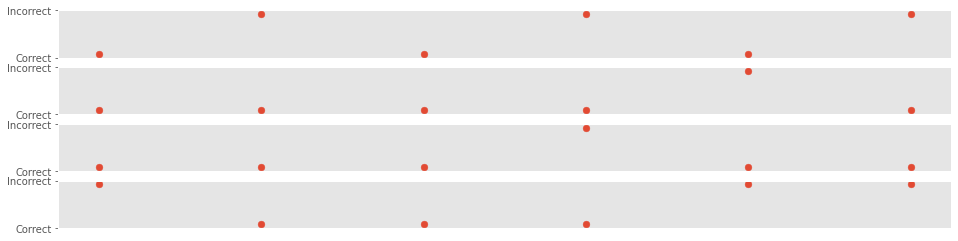

In [18]:
bernoulli = stats.bernoulli(p=0.5)

fig, axs = plt.subplots(4, 1, figsize=(16, 4))
for i, ax in enumerate(axs.flatten()):
    results = bernoulli.rvs(6)
    ax.scatter(range(1, 7), results, s=45)
    ax.set_yticks([-0.1, 1.1])
    ax.set_yticklabels(["Correct", "Incorrect"])
    ax.set_xticks(())
    

Instead of considering the specific sequence of correct or incorrect answers, it seems more natural to consider the **number** of correct and incorrect answers.

**Question:** What is the distribution of the number of correct answers by Muriel under Fisher's hypothesis?

If Fisher is correct, and Muriels answers are totally random, then the distribution of the number of cups Muriel gets correct is a Binomial distribution

$$\text{# of cups guessed correctly} \sim \text{Binomial} (n=6, p=0.5)$$

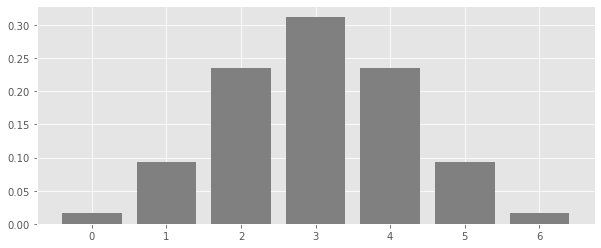

In [22]:
binomial = stats.binom(n=6, p=0.5)

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.bar(range(7), [binomial.pmf(i) for i in range(7)], color="grey")

Muriel guessing all but one correctly seems like an extremely suprising event given this assumption.  We can charecterize our **degree of suprise in the data given our assumption** by calculating the following proability:

$$ P(\text{Observing this Data} \mid \text{Fisher's Assumption})$$

In our example, we can actually calculate this probability exactly from the binomial distribution.

$$ P(\text{Observing this Data} \mid \text{Fisher's Assumption}) = {{6}\choose{5}} 0.5^6 $$

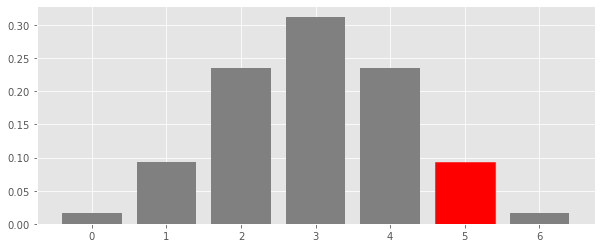

In [24]:
bernoulli = stats.binom(n=6, p=0.5)

fig, ax = plt.subplots(1, figsize=(10, 4))
bars = ax.bar(range(7), [bernoulli.pmf(i) for i in range(7)], align="center", color="grey")
bars[5].set_color('red')

Fisher observed that, in fact, he would have been suprized if he had observed this data **or any data even more extreme than this**, so a more corrct measure of suprise would be

$$ P(\text{Data As Or More Extreme} \mid \text{Fisher's Assumption}) = {{6}\choose{5}} 0.5^5 0.5^1 +{{6}\choose{6}} 0.5^6  $$

Text(0, 0.5, 'Probability')

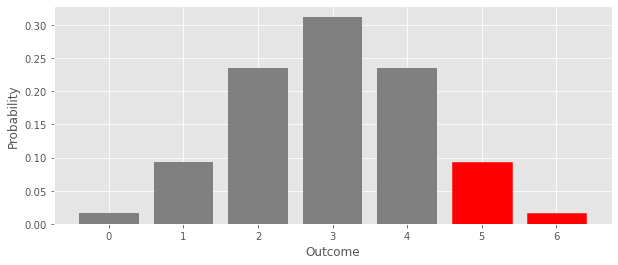

In [25]:
bernoulli = stats.binom(n=6, p=0.5)

fig, ax = plt.subplots(1, figsize=(10, 4))
bars = ax.bar(range(7), [bernoulli.pmf(i) for i in range(7)], align="center", color="grey")
bars[5].set_color('red')
bars[6].set_color('red')
ax.set_xlabel('Outcome')
ax.set_ylabel('Probability')

We can calculate this number easily in python.

In [26]:
binomial = stats.binom(n=6, p=0.5)

# CDF gives P(draw <= value)
prob_equal_or_more_extreme = 1 - binomial.cdf(4)
print("Probability of Observing Data More Equal or More Extreme than Actual: {:2.2}".format(
    prob_equal_or_more_extreme))

Probability of Observing Data More Equal or More Extreme than Actual: 0.11


We now have a different sort of problem, how do we *interpret* this level of suprise?  Are we suprised of not?

**Vote:** Do you believe Muriel given this evidence?

In [32]:
(.99)**95/100

0.003848960788934845

## Hypothesis Testing: The Big Picture

The tea example was reported in Fisher's classic text *The Design of Experiments*, and it is a prototypical example of the logic behind Hypothesis testing.





#### State a Scientific Question.

State a scientific question (a yes/no question) of interest that can be answered with data that you have collected or intend to collect.

In Fisher's tea experiment the scientific question is 

> Can Muriel identify milk into tea from tea into milk?

#### Take a Skeptical Stance, and Clearly State This Hypothesis.

The skeptics stance is called the **Null Hypothesis**.

In Fisher's experiment, the Null Hypothesis is 

> Muriel cannot tell the difference, and hence is guessing at random.

#### State the Opposite of Your Skeptical Hypothesis.

The opposite of the Null Hypothesis is called the **Alternate Hypothesis**.  It **must** be the exact opposite of the Null, so that the Null and the Alternate cover *all* possibilities.

Our alternative hypothesis in the Tea case is:

> Muriel is not guessing randomly.

**Note:** This covers two cases!  On one hand, Muriel *could* be better than chance, but Muriel could also be worse!  We will discuss how to deal with this possible issue shortly.

#### Create a Probablistic Model of the Stiuation Assuming the Null Hypothesis is True

The Null Hypothesis generally states that some process is governed by only chance, so conceptualize exactly how the data is being generated probabalistically.

In Fisher's example, our probabalistic model is

$$\text{# of cups guessed correctly} \mid \text{Muriel is guessing randomly}\sim \text{Binomial}(n=6, p=0.5)$$

#### Decide how Suprised You Need to Be to Reject Your Skeptical Assumption

Before looking at any data, set a threshold for you skepticism, which is traditionally labeled $\alpha$.  This threshold can be based on many considerations.

We neglected to do this in our tea example.

**Note:** It is a common pracitice to set a threshold of $\alpha = 0.05$ with no thought of reflection.  This is a source of much consternation in statistical circles, and you should not do so without reflection.

#### Collect Your Data.

![Big Data](images/bigdata.jpg)

#### Calculate the Probability of Finding a Result Equally or More Extreme than Actually Observed Assuming the Null Hypothesis is True.

This calculated conditional probability is called the **p-value**.

In Fisher's example, the calculated p-value is:

$$ P(\text{Observing Data As Or More Extreme} \mid \text{Null Hypothesis}) = {{6}\choose{5}} 0.5^6 + {{6}\choose{6}} 0.5^6  $$

#### Compare the p-value to Your Stated Rejection Threshold.

If the p-value is smaller than your rejection threashold, you must reject your Null Hypothesis as **inconsistent with the data you collected**.

That is, you have demonstrated, to your stated tolerance, that your skeptical stance is unlikely to be true.

A useful way to think of this is:

  - **Skptical Stance**: I will act as if my skeptics stance is true.
  - **Alternate Stance**: I will act as if my skeptics stance is not true.
  
In the case that your computed p-value is smaller than your stated threshold, you must act as if the skeptic's hyptothesis is **not true** (though, of course, it may very well be and you just got unlucky).

#### Publish Your Data and Code Online With Explicit Instructions for Replicating Your Result.

![Github Cats](images/github-cats.jpg)

### Comments

If you happen to *not* find sufficient evidence to reject your null hypothesis, **you have not proven that your null hypothesis is true**.

Indeed, the entire procedure was predicated on **assuming** the null was true **until sufficient evidence is found to make this stance untenable**.  If you do not reject the null, you simply continue to hold this skeptic's stance until more evidence comes along and you need to re-evaluate.

### One Sample Exact Test of Population Proportion

This kind of test, where we are studying how many times something happens and the null distribution is binomial, is called a **one sample exact test of a population proportion**.

Let's do another example to get reps on the idea.

#### Setup

Matt is all about cosistency in skateboarding, and is learning to Kickflip.  He does not want to move onto another trick until he can cleanly land a Kickflip $80\%$ of the time.

Being a scientist, he is skeptical of himself, and assumes the following hypothesis until he can prove otherwise:

> Null Hypothesis: $P(\text{I Land a Kickflip}) <= 0.8$

On a particularly uneventful saturday, Matt keeps track of $100$ kickflip attempts (after properly warming up and stretching of course, Matt is 36).  He does quite well, and lands $84$ of them.

**Question:** Should Matt move on to another trick?

#### Create a Probablistic Model of the Stiuation Assuming the Null Hypothesis is True

We would like to create a probabilstic model of my Kickflip ability under the null hypothesis that

> Null Hypothesis: $P(\text{I Land a Kickflip}) \leq 0.8$

But this is kind of hard, because I don't have a single probability to rely on.  But consider my intent, to **be as skeptical as possible**.  If I base my model on, say, a probability of $0.5$, then it is **easier to collect data that is inconsistent with this probability**.  So, given my setup, I should use the probability that allows me to be **most skeptical**.  

If I asssume that:

> Null Hypothesis': $P(\text{I Land a Kickflip}) = 0.8$

This allows me to be **maximally skeptical**.  It is **most difficult** to reject the null if I use a probability of $0.8$.

What I really want now is to know the probability I land $k$ out of $100$ kickflips.  To get there, I need to make one additional assumption: that each kickflip is independent of the rest.  This allows me to come up with a full probabilistic model under the Null:

$$ \text{# of kickflips landed } \mid \text{ Null Hypothesis} \sim \text{Binomial}(n=100, p=0.8) $$

Text(0.5, 1.0, '# of Kickflips Landed Under The Null Hypothesis')

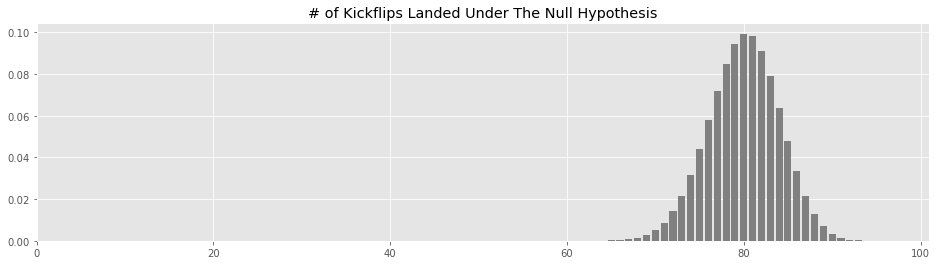

In [33]:
binomial = stats.binom(100, 0.8)

fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(101), [binomial.pmf(i) for i in range(101)], align="center", color="grey")
ax.set_xlim(0, 101)
ax.set_title("# of Kickflips Landed Under The Null Hypothesis")

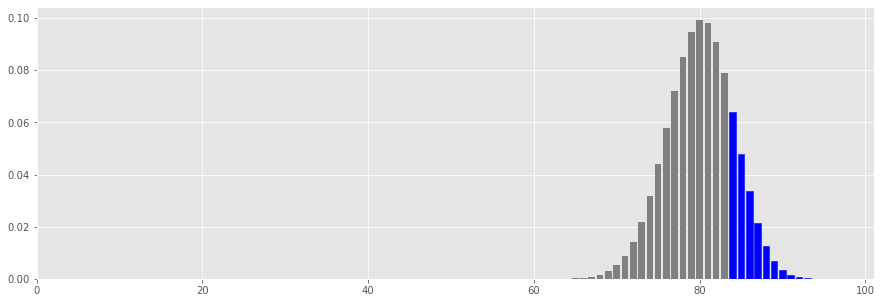

In [47]:
n=100
p=0.8
k = 84
kick_flip = stats.binom(n,p)

fig, ax = plt.subplots(figsize=(15,5))
bars = ax.bar(range(n+1), [binomial.pmf(i) for i in range(n+1)], align='center', color='grey')
ax.set_xlim(0,n+1)

for k in range(k,n+1):
    bars[k].set_color('blue');

In [51]:
k = 84
1 - kick_flip.cdf(k-1)

0.19233758459760086

#### Decide how Suprised You Need to Be to Reject Your Skeptical Assumption

Rejecting the null hypothesis here incorrectly is not particularly harmful, as it just means I get to start working on another trick without being super confident in my kickflips.  So I'll set my rejection threshold rather high, let's take 

$$ \alpha = 0.2 $$

#### Collect Your Data.

![Kickflip](images/kickflip.jpg)

Matt landed 84 of 100 kickflips.

#### Calculate the Probability of Finding a Result Equally or More Extreme than Actually Observed Assuming the Probabilistic Model You Created.

This is almost the same calculation as the tea example.

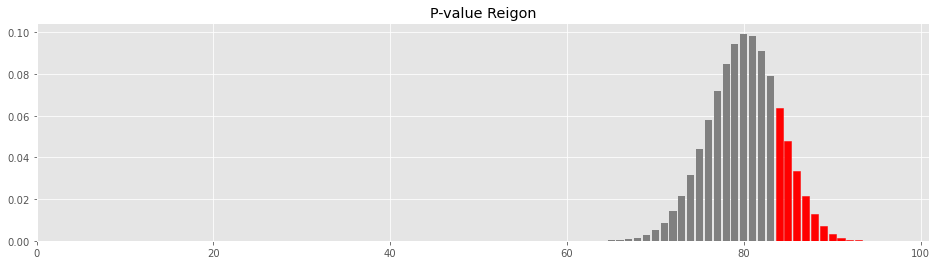

In [52]:
fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(101), [binomial.pmf(i) for i in range(101)], color="grey", align="center")
ax.set_xlim(0, 101)

for i in range(84, 101):
    bars[i].set_color('red')
    
_ = ax.set_title("P-value Reigon")

In [53]:
prob_equal_or_more_extreme = 1 - binomial.cdf(83)
print("Probability of Observing Data More Equal or More Extreme than Actual: {:2.2}".format(
    prob_equal_or_more_extreme))

Probability of Observing Data More Equal or More Extreme than Actual: 0.19


#### Compare the p-value to Your Stated Rejection Threashold.

We decided to reject at a threshold of $\alpha = 0.2$.  Since our p-value is less than this threshold, I can now work on some new tricks!

**Exercise**: Redo the example with a sample size of 250 kickflips, whith 210 of them landed (this is the same *proportion* of lands).  How does the p-value change?

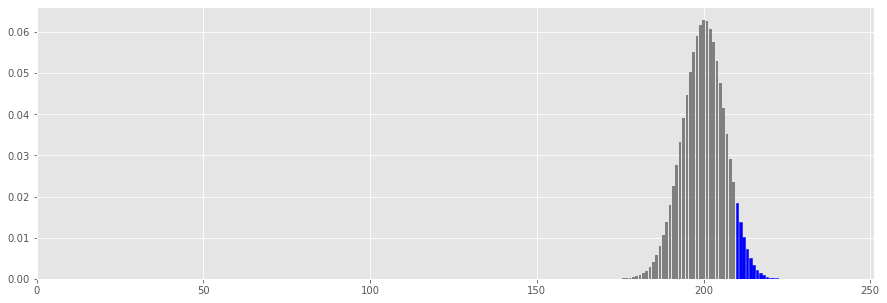

In [55]:
n=250
p=0.8
k = 210
kick_flip = stats.binom(n,p)

fig, ax = plt.subplots(figsize=(15,5))
bars = ax.bar(range(n+1), [kick_flip.pmf(i) for i in range(n+1)], align='center', color='grey')
ax.set_xlim(0,n+1)

for k in range(k,n+1):
    bars[k].set_color('blue');

In [57]:
k  = 210
1- kick_flip.cdf(k-1)

0.06368363842355484

In [ ]:
# 6% is highly unlikley given the null is true with 20% threshold 
# therefore, reject the null hypothesis a